***Syntax natürlicher Sprachen, WS 2022/23***

---
# Übung 7 (Lösung Präsenzaufgaben)

In [1]:
import nltk
from nltk import Tree

In [2]:
def test_grammar(grammar, sentences):
    cfg = nltk.grammar.FeatureGrammar.fromstring(grammar)
    parser = nltk.parse.FeatureEarleyChartParser(cfg)
    
    for i, sent in enumerate(sentences, 1):
        print("Satz {}: {}".format(i, sent))
        results = parser.parse(sent.split())
        analyzed = False
        for tree in results:
            tree = Tree.fromstring(str(tree).replace(", ",","))
            #tree.pretty_print(unicodelines=True)
            display(tree)
            analyzed = True
        if not analyzed:
            print(">> Keine Analyse möglich")

---
## Aufgabe 1 : FCFG: Kongruenz in Nominalphrasen

#### Orientieren Sie sich an folgender Tabelle zur Mehrdeutigkeit der Formen des bestimmen Artikels im Deutschen und passen Sie die Grammatik unten so an, dass sie nur noch grammatikalisch korrekte Nominalphrasen als Teil von Sätzen akzeptiert. Konzentrieren Sie sich auf die Kongruenz von Artikel und Nomen im Genus.

|Form|mögliche Merkmale|
|----|-----------------|
|der|[NUM=sg, GEN=mask, CASE=nom]|
|&nbsp;|[NUM=sg, GEN=fem, CASE=dat]|
|&nbsp;|[NUM=sg, GEN=fem, CASE=GEN]|
|&nbsp;|[NUM=pl, CASE=GEN]|
|die|[NUM=sg, GEN=fem, CASE=nom]|
|&nbsp;|[NUM=sg, GEN=fem, CASE=akk]|
|&nbsp;|[NUM=pl, CASE=nom]|
|&nbsp;|[NUM=pl, CASE=akk]|
|das|[NUM=sg, GEN=neut, CASE=nom]|
|&nbsp;|[NUM=sg, GEN=neut, CASE=akk]|

In [3]:
#Lösung A:
grammar = """
S -> NP VP

NP -> DET[GEN=?x] NOM[GEN=?x]
NOM[GEN=?x] -> N[GEN=?x]
VP -> V NP NP | V NP | V

DET[GEN=mask] -> "der"
DET[GEN=fem] -> "die"
DET[GEN=neut] -> "das"

N[GEN=mask] -> "Mann"
N[GEN=fem] -> "Frau"
N[GEN=neut] -> "Buch"

V -> "gibt" | "schenkt" | "schläft" | "gefällt" | "kennt"
"""

In [4]:
pos_sentences = ["der Mann schläft"]
neg_sentences = ["das Mann schläft"]

In [5]:
test_grammar(grammar, neg_sentences)

Satz 1: das Mann schläft
>> Keine Analyse möglich


Satz 1: der Mann schläft


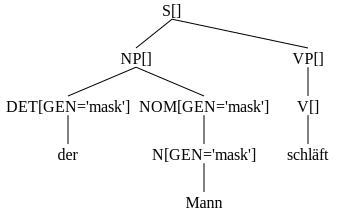

In [6]:
test_grammar(grammar, pos_sentences)

#### Optional können Sie auch folgende NP-Grammatik, die die Features aus der Tabelle oben enthält, um syntaktische Constraints erweitern und testen:

In [7]:
#Lösung B:
grammar = """

NP[AGR=?x] -> DET[AGR=?x] NOM[AGR=?x]
NOM[AGR=?x] -> N[AGR=?x]

DET[AGR=[NUM=sg, GEN=mask, CASE=nom]] -> "der"
DET[AGR=[NUM=sg, GEN=fem, CASE=dat]] -> "der"
DET[AGR=[NUM=sg, GEN=fem, CASE=gen]] -> "der"
DET[AGR=[NUM=pl, CASE=gen]] -> "der"

DET[AGR=[NUM=sg, GEN=fem, CASE=nom]] -> "die"
DET[AGR=[NUM=sg, GEN=fem, CASE=akk]] -> "die"
DET[AGR=[NUM=pl, CASE=nom]] -> "die"
DET[AGR=[NUM=pl, CASE=akk]] -> "die"

DET[AGR=[NUM=sg, GEN=neut, CASE=nom]] -> "das"
DET[AGR=[NUM=sg, GEN=neut, CASE=akk]] -> "das"


N[AGR=[NUM=sg, GEN=mask]] -> "Mann"
N[AGR=[NUM=sg, GEN=fem]] -> "Frau"
N[AGR=[NUM=sg, GEN=neut]] -> "Buch"
"""

In [8]:
pos_sg_NPs = ["der Mann", "der Frau", "die Frau", "das Buch"]
neg_sg_NPs = ["das Mann", "die Mann", "das Frau", "der Buch", "die Buch"]

In [9]:
test_grammar(grammar, neg_sg_NPs)

Satz 1: das Mann
>> Keine Analyse möglich
Satz 2: die Mann
>> Keine Analyse möglich
Satz 3: das Frau
>> Keine Analyse möglich
Satz 4: der Buch
>> Keine Analyse möglich
Satz 5: die Buch
>> Keine Analyse möglich


Satz 1: der Mann


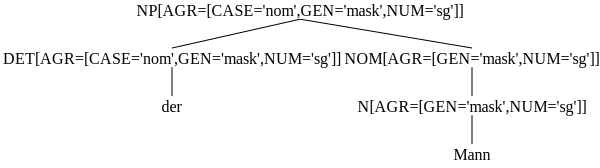

Satz 2: der Frau


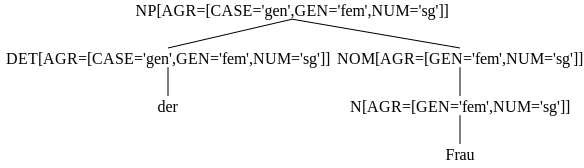

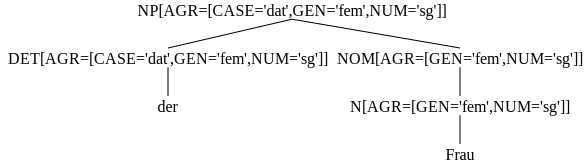

Satz 3: die Frau


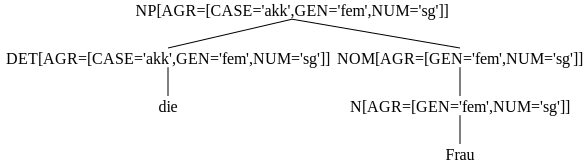

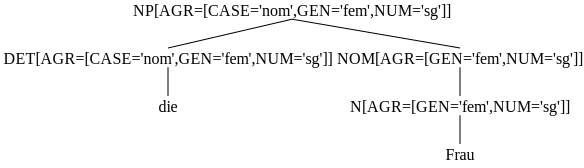

Satz 4: das Buch


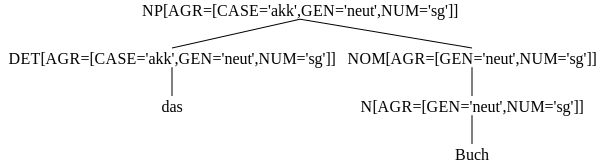

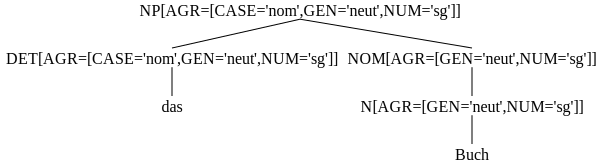

In [10]:
test_grammar(grammar, pos_sg_NPs)

---
## Aufgabe 2: FCFG: Kasus und Subkategorisierung

#### Als nächstes sollen Kasusbedingungen in die Grammatik integriert werden (fügen Sie ggf. neue lexikalische Regeln für die Beispielsätze hinzu):

1. Es gibt nur eine Nominalphrase im Nominativ (Subjekt).
1. Je nach Valenzstellen des Verbes sollen nur Nominalphrasen in den korrekten Kasus akzeptiert werden.
1. *Optional:* Versuchen Sie die freie Satzstellung des Deutschen zu berücksichtigen. (Sie können dazu die VP-Struktur auflösen, also flachere Satzregeln verwenden, und ein zusätzliches SBJCASE-Merkmal verwenden.)

In [11]:
pos_sentences = [   
    "das Buch gefällt der Frau",
    "das Buch kennt die Frau",
    "der Mann gibt der Frau das Buch"
]

neg_sentences = [
    "das Mann schläft",
    "der Mann schläft das Buch",  #Verletzung Subkategorisierung-Constraint
    "die Frau gefällt das Buch",  #Verletzung Objektkasus-Constraint
    "den Mann schläft",  #Verletzung Subjektkasus-Constraint
    "die Frau gibt das Buch"  #Verletzung Subkategorisierung-Constraint
]

In [12]:
# Lösung für Bedingungen 1 + 2: 
grammar = """

S -> NP[CASE=nom] VP

NP[CASE=?y] -> DET[GEN=?x,CASE=?y] NOM[GEN=?x,CASE=?y]
NOM[GEN=?x] -> N[GEN=?x]

VP -> V[SUBCAT=0]
VP -> V[SUBCAT=1,OBJCASE=?o] NP[CASE=?o]
VP -> V[SUBCAT=2,IOBJCASE=?io,OBJCASE=?o] NP[CASE=?io] NP[CASE=?o]

N[GEN=mask] -> "Mann"
N[GEN=fem] -> "Frau"
N[GEN=neut] -> "Buch"

V[SUBCAT=0] -> "schläft"
V[SUBCAT=1,OBJCASE=dat] -> "gefällt"
V[SUBCAT=1,OBJCASE=akk] -> "kennt"
V[SUBCAT=2, IOBJCASE=dat, OBJCASE=akk] -> "gibt" | "schenkt"

DET[GEN=mask,CASE=akk] -> "den"
DET[GEN=mask,CASE=nom] -> "der"
DET[GEN=fem,CASE=dat] -> "der"
DET[GEN=fem,CASE=nom] -> "die"
DET[GEN=fem,CASE=akk] -> "die"
DET[GEN=neut,CASE=nom] -> "das"
DET[GEN=neut,CASE=akk] -> "das"
"""

In [13]:
test_grammar(grammar, neg_sentences)

Satz 1: das Mann schläft
>> Keine Analyse möglich
Satz 2: der Mann schläft das Buch
>> Keine Analyse möglich
Satz 3: die Frau gefällt das Buch
>> Keine Analyse möglich
Satz 4: den Mann schläft
>> Keine Analyse möglich
Satz 5: die Frau gibt das Buch
>> Keine Analyse möglich


Satz 1: das Buch gefällt der Frau


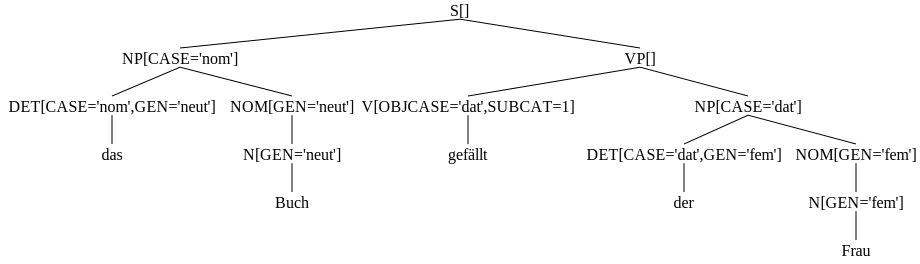

Satz 2: das Buch kennt die Frau


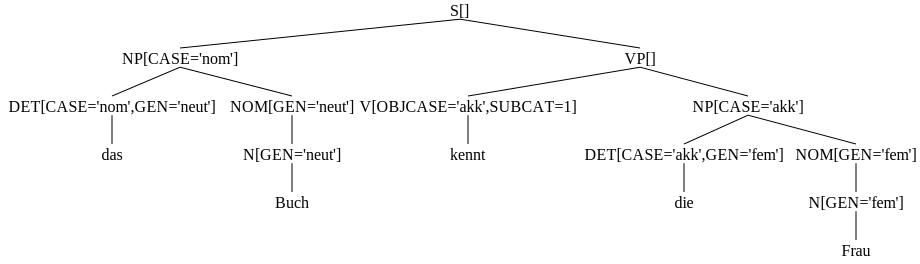

Satz 3: der Mann gibt der Frau das Buch


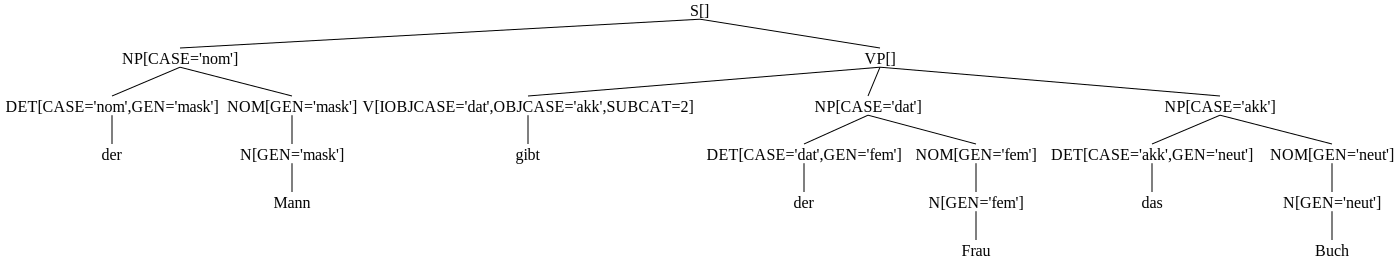

In [14]:
test_grammar(grammar, pos_sentences)

#### Testsätze für invertierte Wortstellung (Bedingung 3):

In [15]:
pos_inv_sentences = [
    "den Mann kennt die Frau",
    "die Frau kennt der Mann",
    "der Frau gibt der Mann das Buch",
    "das Buch gibt der Mann der Frau"
]

In [16]:
# Lösung A für Bedingungen 1 + 2 + 3 (beliebige NP in Vorfeld = satzinitial):

#    -> Auflösung VP-Struktur (flachere Satzregeln, vgl. TIGER-Treebank)
#    -> zusätzliches SBJCASE-Merkmal

grammar = """

#intransitiv:
S -> NP[CASE=?s] V[SUBCAT=0,SBJCASE=?s]

#transitiv ("die Frau kennt den Mann"  vs  "den Mann kennt die Frau"):
S -> NP[CASE=?s] V[SUBCAT=1,SBJCASE=?s,OBJCASE=?o] NP[CASE=?o]
S -> NP[CASE=?o] V[SUBCAT=1,SBJCASE=?s,OBJCASE=?o] NP[CASE=?s]

#ditransitiv ("der Mann gibt der Frau das Buch" vs "der Mann gibt das Buch der Frau")
S -> NP[CASE=?s] V[SUBCAT=2,SBJCASE=?s,IOBJCASE=?io,OBJCASE=?o] NP[CASE=?io] NP[CASE=?o]
S -> NP[CASE=?s] V[SUBCAT=2,SBJCASE=?s,IOBJCASE=?io,OBJCASE=?o] NP[CASE=?o] NP[CASE=?io]

#ditransitiv ("der Frau gibt der Mann das Buch" vs "das Buch gibt der Mann der Frau"):
S -> NP[CASE=?io] V[SUBCAT=2,SBJCASE=?s,IOBJCASE=?io,OBJCASE=?o] NP[CASE=?s] NP[CASE=?o]
S -> NP[CASE=?o] V[SUBCAT=2,SBJCASE=?s,IOBJCASE=?io,OBJCASE=?o] NP[CASE=?s] NP[CASE=?io]


NP[CASE=?y] -> DET[GEN=?x,CASE=?y] NOM[GEN=?x,CASE=?y]
NOM[GEN=?x] -> N[GEN=?x]


N[GEN=mask] -> "Mann"
N[GEN=fem] -> "Frau"
N[GEN=neut] -> "Buch"

V[SUBCAT=0,SBJCASE=nom] -> "schläft"
V[SUBCAT=1,SBJCASE=nom,OBJCASE=dat] -> "gefällt"
V[SUBCAT=1,SBJCASE=nom,OBJCASE=akk] -> "kennt"
V[SUBCAT=2,SBJCASE=nom, IOBJCASE=dat, OBJCASE=akk] -> "gibt" | "schenkt"

DET[GEN=mask,CASE=akk] -> "den"
DET[GEN=mask,CASE=nom] -> "der"
DET[GEN=fem,CASE=dat] -> "der"
DET[GEN=fem,CASE=nom] -> "die"
DET[GEN=fem,CASE=akk] -> "die"
DET[GEN=neut,CASE=nom] -> "das"
DET[GEN=neut,CASE=akk] -> "das"
"""

Satz 1: den Mann kennt die Frau


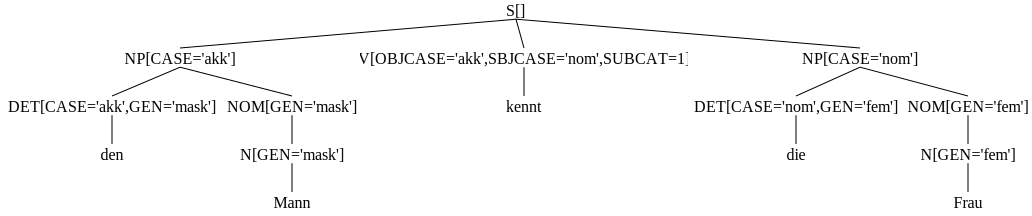

Satz 2: die Frau kennt der Mann


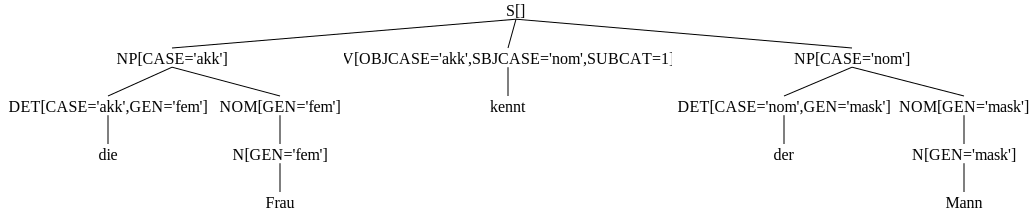

Satz 3: der Frau gibt der Mann das Buch


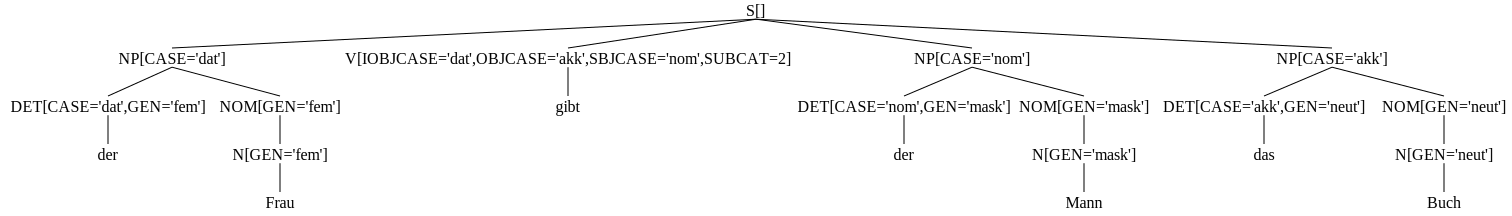

Satz 4: das Buch gibt der Mann der Frau


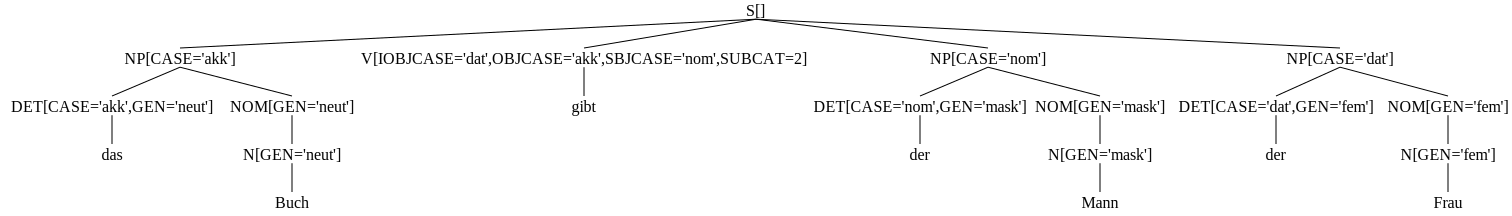

In [17]:
test_grammar(grammar, pos_inv_sentences)

In [18]:
test_grammar(grammar, neg_sentences)

Satz 1: das Mann schläft
>> Keine Analyse möglich
Satz 2: der Mann schläft das Buch
>> Keine Analyse möglich
Satz 3: die Frau gefällt das Buch
>> Keine Analyse möglich
Satz 4: den Mann schläft
>> Keine Analyse möglich
Satz 5: die Frau gibt das Buch
>> Keine Analyse möglich


Satz 1: das Buch gefällt der Frau


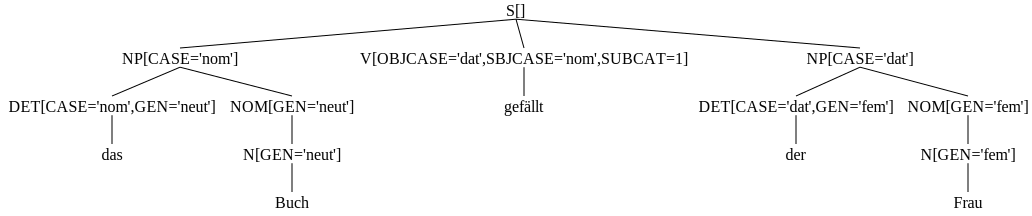

Satz 2: das Buch kennt die Frau


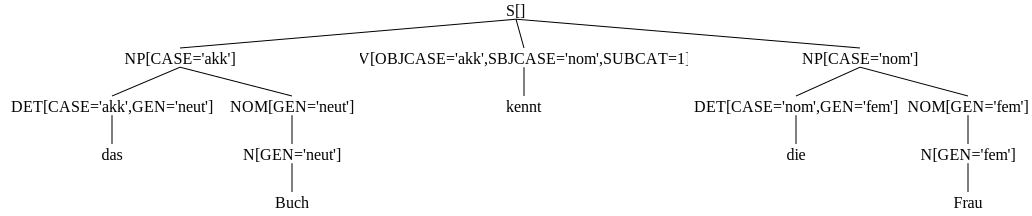

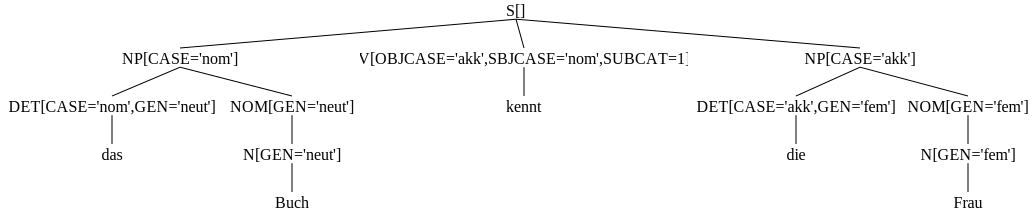

Satz 3: der Mann gibt der Frau das Buch


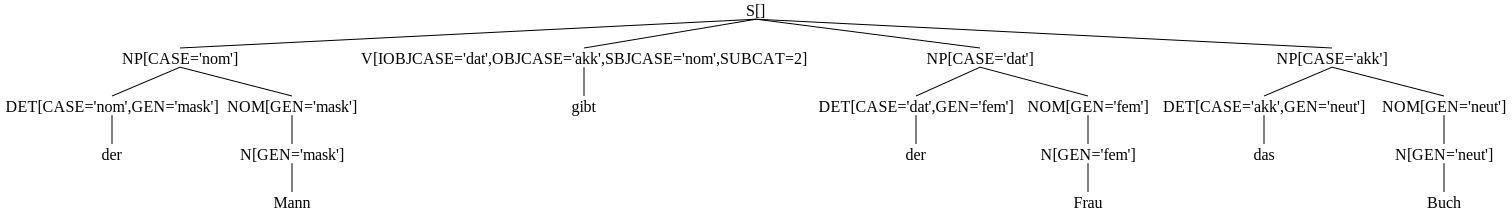

In [19]:
test_grammar(grammar, pos_sentences)

#### Alternative Lösung für 3 mit Slah-Kategorie:

In [20]:
# Lösung B für Bedingungen 1 + 2 + 3 mit INV-Merkmal und Slash-Kategorie (Gap-Merkmal):

#   -> invertierte VP bei transitiven Verben: (NP V)=VP NP
#   -> Slash-Kategorie für die an das Satzende gestellte Objekt-NP bzw. Indirekt-Objekt-NP in ditransitiven Sätzen

grammar = """

S -> NP[CASE=nom] VP

#####Regeln für invertierte transitive Sätze (ohne Slash-Feature, nur Wortstellung in VP vertauscht):
S -> VP[+INV] NP[CASE=nom]
VP[+INV] -> NP[CASE=?x] V[SUBCAT=1,OBJCASE=?x]

#####Regeln für invertierte ditransitive Sätze (mit Slash-Kategorie für long distance dependency am Satzende):
S -> VP[+INV]/NP[CASE=?x] NP[CASE=nom] NP[CASE=?x]
VP[+INV]/NP[CASE=?io] -> NP/NP[CASE=?io] NP[CASE=?o] V[SUBCAT=2,IOBJCASE=?io,OBJCASE=?o] 
VP[+INV]/NP[CASE=?o] -> NP[CASE=?io] NP/NP[CASE=?o] V[SUBCAT=2,IOBJCASE=?io,OBJCASE=?o] 
NP/NP -> 


NP[CASE=?y] -> DET[GEN=?x,CASE=?y] NOM[GEN=?x,CASE=?y]
NOM[GEN=?x] -> N[GEN=?x]

VP -> V[SUBCAT=0]
VP -> V[SUBCAT=1,OBJCASE=?x] NP[CASE=?x]
VP -> V[SUBCAT=2,IOBJCASE=?x,OBJCASE=?y] NP[CASE=?x] NP[CASE=?y]

N[GEN=mask] -> "Mann"
N[GEN=fem] -> "Frau"
N[GEN=neut] -> "Buch"

V[SUBCAT=0] -> "schläft"
V[SUBCAT=1,OBJCASE=dat] -> "gefällt"
V[SUBCAT=1,OBJCASE=akk] -> "kennt"
V[SUBCAT=2, IOBJCASE=dat, OBJCASE=akk] -> "gibt" | "schenkt"

DET[GEN=mask,CASE=akk] -> "den"
DET[GEN=mask,CASE=nom] -> "der"
DET[GEN=fem,CASE=dat] -> "der"
DET[GEN=fem,CASE=nom] -> "die"
DET[GEN=fem,CASE=akk] -> "die"
DET[GEN=neut,CASE=nom] -> "das"
DET[GEN=neut,CASE=akk] -> "das"
"""

Satz 1: den Mann kennt die Frau


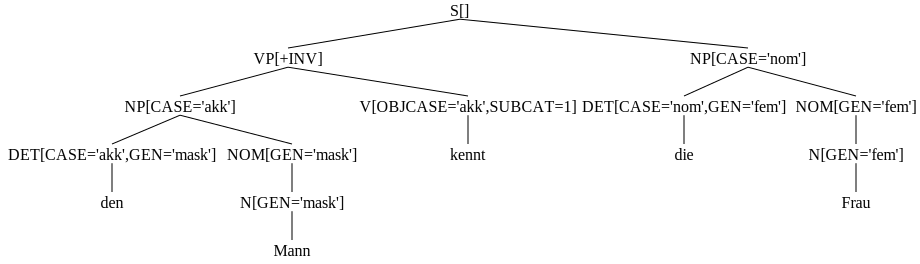

Satz 2: die Frau kennt der Mann


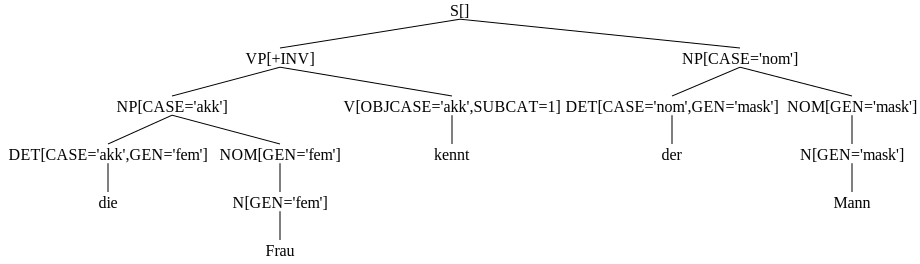

Satz 3: der Frau gibt der Mann das Buch


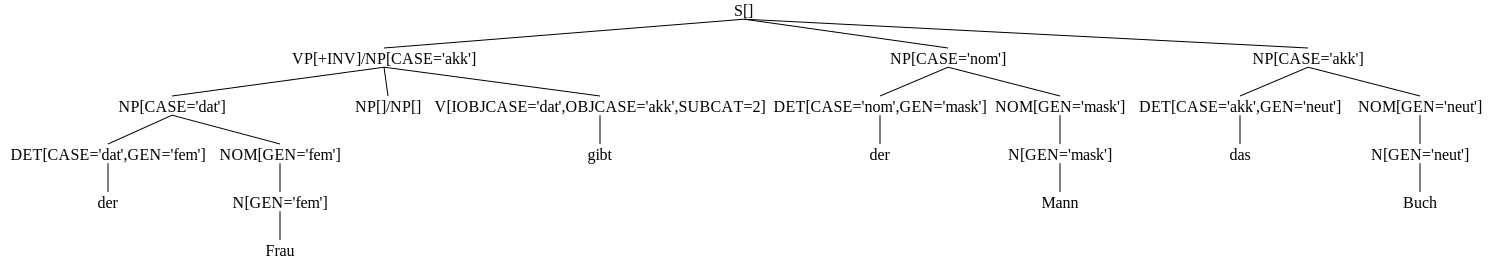

Satz 4: das Buch gibt der Mann der Frau


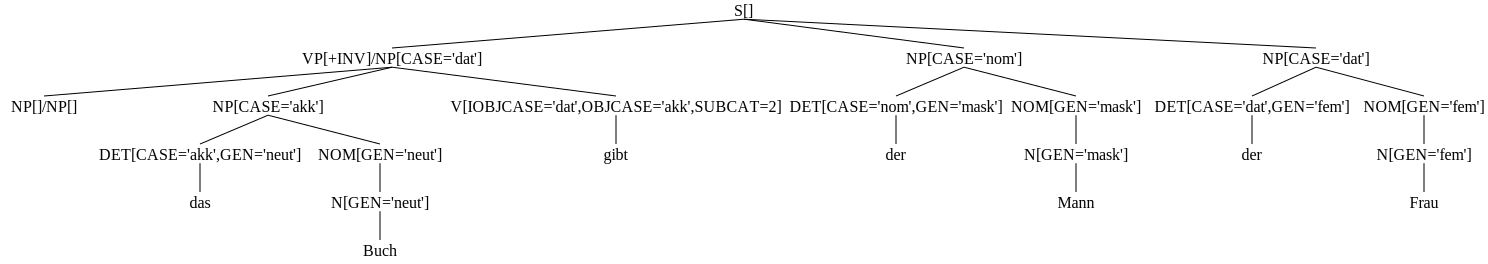

In [21]:
test_grammar(grammar, pos_inv_sentences)

In [22]:
test_grammar(grammar, neg_sentences)

Satz 1: das Mann schläft
>> Keine Analyse möglich
Satz 2: der Mann schläft das Buch
>> Keine Analyse möglich
Satz 3: die Frau gefällt das Buch
>> Keine Analyse möglich
Satz 4: den Mann schläft
>> Keine Analyse möglich
Satz 5: die Frau gibt das Buch
>> Keine Analyse möglich


Satz 1: das Buch gefällt der Frau


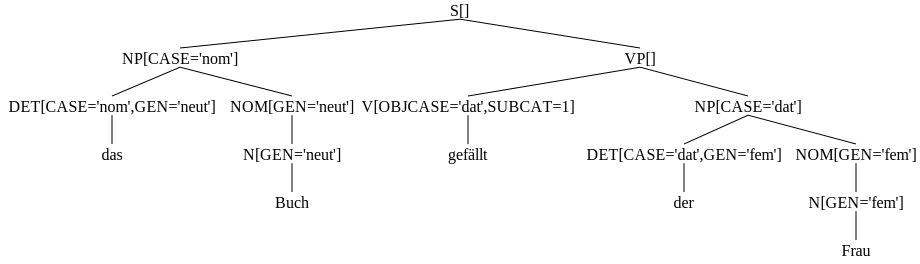

Satz 2: das Buch kennt die Frau


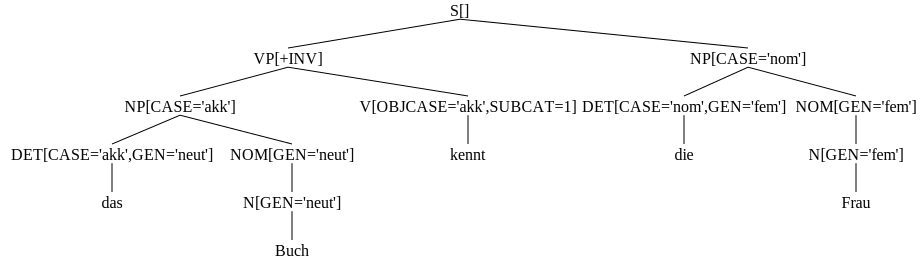

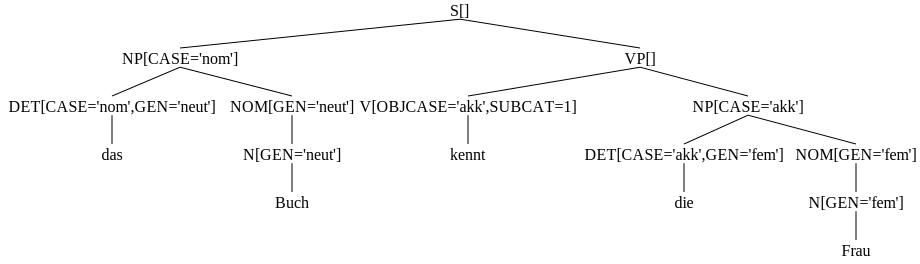

Satz 3: der Mann gibt der Frau das Buch


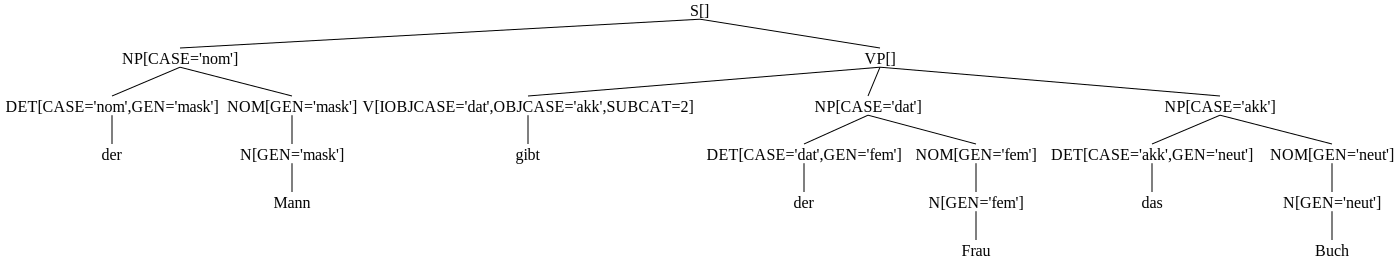

In [23]:
test_grammar(grammar, pos_sentences)

---
## Aufgabe 3: Plural-Agreement für Subjekt und Verb

#### Ergänzen Sie die Grammatik um die Möglichkeit, das Subjekt in den Plural zu setzen.

#### Dafür müssen Sie folgendes tun:
  1. Erstellen Sie lexikalische Regeln für Pluralformen der Verben und Substantive (Nominativ ist ausreichend.).
  1. Vervollständigen Sie die lexikalischen Regeln für die Form des Artikels *die* um die korrekte Merkmalstruktur für den Plural.
  1. Formulieren Sie eine Kongruenzbedingung in Numerus zwischen Verb und Subjekt.

In [24]:
pos_sentences = [   
    "das Buch gefällt der Frau",
    "das Buch kennt die Frau",
    "der Mann gibt der Frau das Buch",
    
    "die Männer geben der Frau das Buch",
    "die Bücher gefallen der Frau",
    "die Frauen schlafen"
]


neg_sentences = [
    "das Mann schläft",
    "der Mann schläft das Buch",
    "die Frau gefällt das Buch",
    "den Mann schläft",
    "die Frau gibt das Buch",
    
    "der Mann geben der Frau das Buch",
    "das Buch gefällt der Frauen",
    "die Frauen schläft"
]

In [25]:
#Lösung A:
grammar = """

S -> NP[CASE=nom,NUM=?x] VP[NUM=?x]

NP[CASE=?y,NUM=?z] -> DET[GEN=?x,CASE=?y,NUM=?z] NOM[GEN=?x,NUM=?z]
NOM[GEN=?x,NUM=?z] -> N[GEN=?x,NUM=?z]

VP[NUM=?z] -> V[SUBCAT=intr,NUM=?z]
VP[NUM=?z] -> V[SUBCAT=tr,OBJCASE=?x,NUM=?z] NP[CASE=?x]
VP[NUM=?z] -> V[SUBCAT=ditr,OBJCASE1=?x,OBJCASE2=?y,NUM=?z] NP[CASE=?x] NP[CASE=?y]

N[GEN=mask,NUM=sg] -> "Mann"
N[GEN=mask,NUM=pl] -> "Männer"
N[GEN=fem,NUM=sg] -> "Frau"
N[GEN=fem,NUM=pl] -> "Frauen"
N[GEN=neut,NUM=sg] -> "Buch"
N[GEN=neut,NUM=pl] -> "Bücher"

V[SUBCAT=intr,NUM=sg] -> "schläft"
V[SUBCAT=intr,NUM=pl] -> "schlafen"
V[SUBCAT=tr,OBJCASE=dat,NUM=sg] -> "gefällt"
V[SUBCAT=tr,OBJCASE=dat,NUM=pl] -> "gefallen"
V[SUBCAT=tr,OBJCASE=akk,NUM=sg] -> "kennt"
V[SUBCAT=tr,OBJCASE=akk,NUM=pl] -> "kennen"
V[SUBCAT=ditr, OBJCASE1=dat, OBJCASE2=akk,NUM=sg] -> "gibt" | "schenkt"
V[SUBCAT=ditr, OBJCASE1=dat, OBJCASE2=akk,NUM=pl] -> "geben" | "schenken"

DET[GEN=mask,CASE=akk,NUM=sg] -> "den"
DET[GEN=mask,CASE=nom,NUM=sg] -> "der"
DET[GEN=fem,CASE=dat,NUM=sg] -> "der"
DET[GEN=fem,CASE=nom,NUM=sg] -> "die"
DET[GEN=fem,CASE=akk,NUM=sg] -> "die"
DET[GEN=neut,CASE=nom,NUM=sg] -> "das"
DET[GEN=neut,CASE=akk,NUM=sg] -> "das"

DET[CASE=nom,NUM=pl] -> "die"
DET[CASE=akk,NUM=pl] -> "die"
"""

In [26]:
test_grammar(grammar, neg_sentences)

Satz 1: das Mann schläft
>> Keine Analyse möglich
Satz 2: der Mann schläft das Buch
>> Keine Analyse möglich
Satz 3: die Frau gefällt das Buch
>> Keine Analyse möglich
Satz 4: den Mann schläft
>> Keine Analyse möglich
Satz 5: die Frau gibt das Buch
>> Keine Analyse möglich
Satz 6: der Mann geben der Frau das Buch
>> Keine Analyse möglich
Satz 7: das Buch gefällt der Frauen
>> Keine Analyse möglich
Satz 8: die Frauen schläft
>> Keine Analyse möglich


Satz 1: das Buch gefällt der Frau


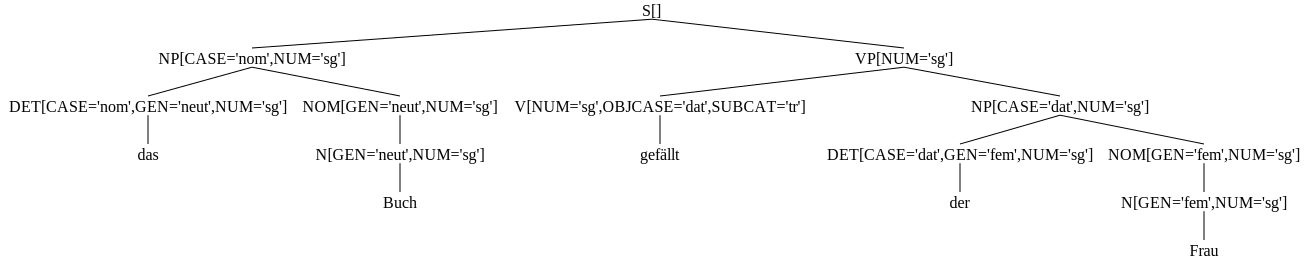

Satz 2: das Buch kennt die Frau


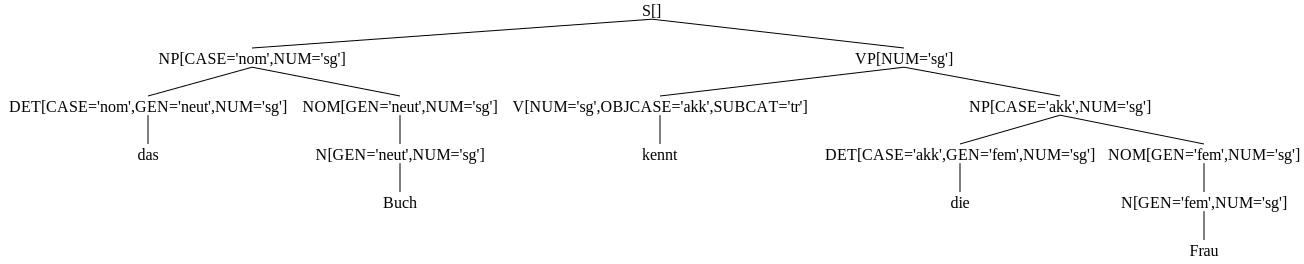

Satz 3: der Mann gibt der Frau das Buch


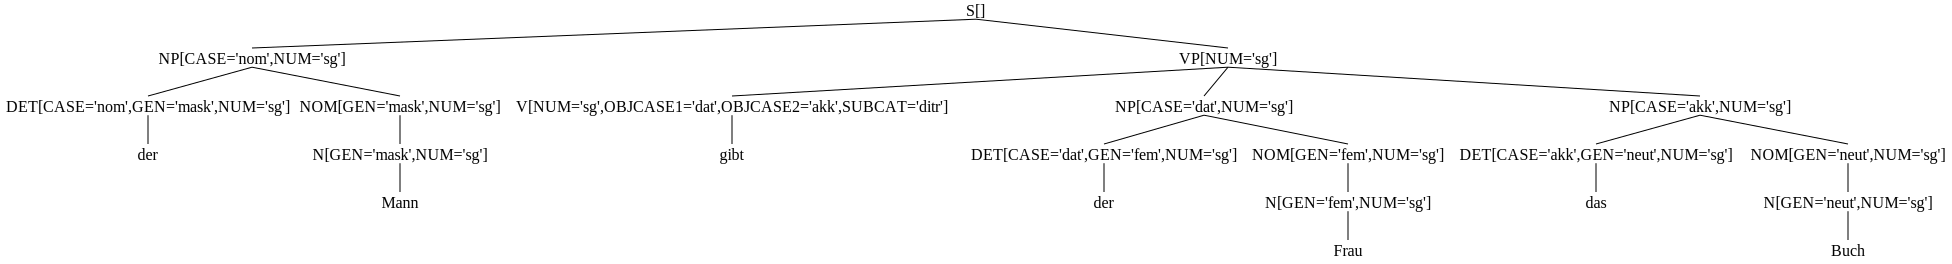

Satz 4: die Männer geben der Frau das Buch


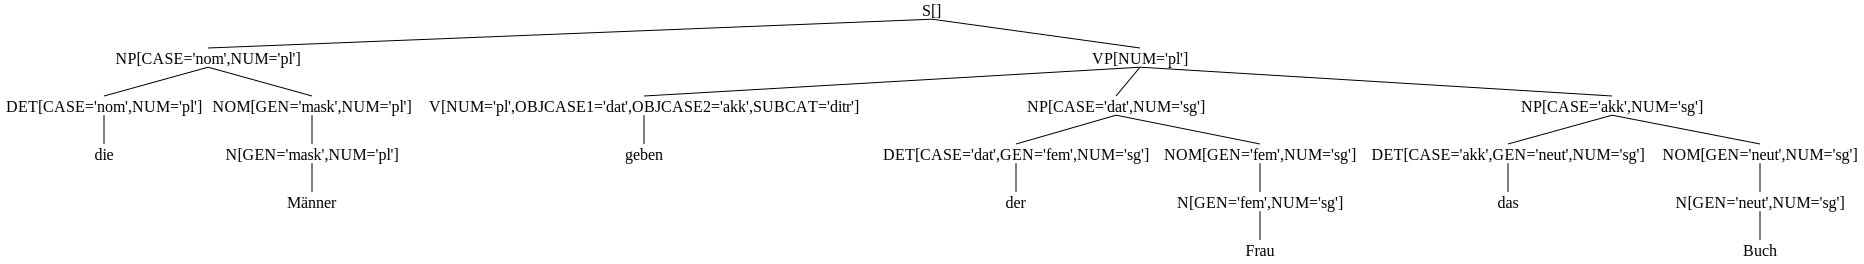

Satz 5: die Bücher gefallen der Frau


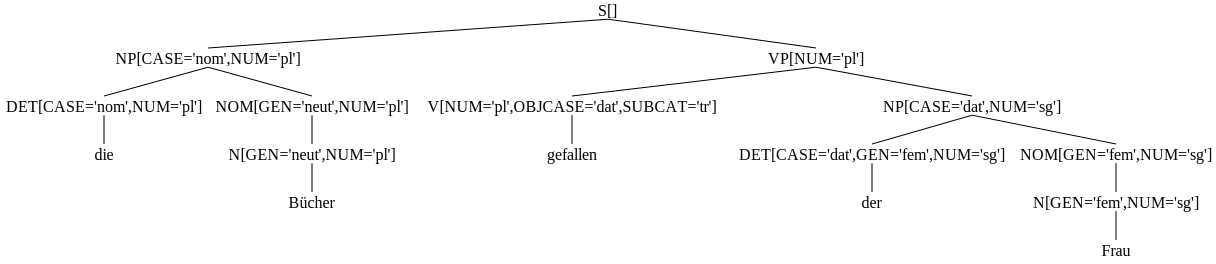

Satz 6: die Frauen schlafen


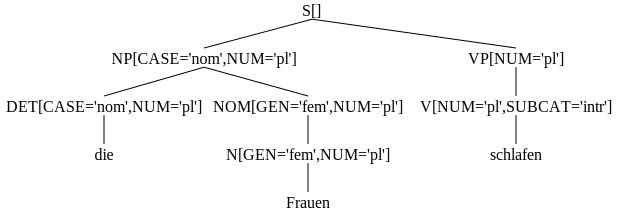

In [27]:
test_grammar(grammar, pos_sentences)

In [28]:
# Lösung B (mit komplexem AGR-Feature):
grammar = """

S -> NP[CASE=nom,AGR=?x] VP[AGR=?x]

NP[CASE=?y,AGR=?x] -> DET[CASE=?y,AGR=?x] NOM[AGR=?x]
NOM[AGR=?x] -> N[AGR=?x]

VP[AGR=?x] -> V[SUBCAT=intr,AGR=?x]
VP[AGR=?x] -> V[SUBCAT=tr,OBJCASE=?o,AGR=?x] NP[CASE=?o]
VP[AGR=?x] -> V[SUBCAT=ditr,OBJCASE1=?io,OBJCASE2=?o,AGR=?x] NP[CASE=?io] NP[CASE=?o]


N[AGR=[GEN=mask,NUM=sg]] -> "Mann"
N[AGR=[GEN=mask,NUM=pl]] -> "Männer"
N[AGR=[GEN=fem,NUM=sg]] -> "Frau"
N[AGR=[GEN=fem,NUM=pl]] -> "Frauen"
N[AGR=[GEN=neut,NUM=sg]] -> "Buch"
N[AGR=[GEN=neut,NUM=pl]] -> "Bücher"

V[SUBCAT=intr,AGR=[NUM=sg]] -> "schläft"
V[SUBCAT=intr,AGR=[NUM=pl]] -> "schlafen"
V[SUBCAT=tr,OBJCASE=dat,AGR=[NUM=sg]] -> "gefällt"
V[SUBCAT=tr,OBJCASE=dat,AGR=[NUM=pl]] -> "gefallen"
V[SUBCAT=tr,OBJCASE=akk,AGR=[NUM=sg]] -> "kennt"
V[SUBCAT=tr,OBJCASE=akk,AGR=[NUM=pl]] -> "kennen"
V[SUBCAT=ditr, OBJCASE1=dat, OBJCASE2=akk,AGR=[NUM=sg]] -> "gibt" | "schenkt"
V[SUBCAT=ditr, OBJCASE1=dat, OBJCASE2=akk,AGR=[NUM=pl]] -> "geben" | "schenken"

DET[GEN=mask,CASE=akk,NUM=sg] -> "den"
DET[CASE=nom,AGR=[GEN=mask,NUM=sg]] -> "der"
DET[CASE=dat,AGR=[GEN=fem,NUM=sg]] -> "der"
DET[CASE=nom,AGR=[GEN=fem,NUM=sg]] -> "die"
DET[CASE=akk,AGR=[GEN=fem,NUM=sg]] -> "die"
DET[CASE=nom,AGR=[GEN=neut,NUM=sg]] -> "das"
DET[CASE=akk,AGR=[GEN=neut,NUM=sg]] -> "das"

DET[CASE=nom,AGR=[NUM=pl]] -> "die"
DET[CASE=akk,AGR=[NUM=pl]] -> "die"
"""

In [29]:
test_grammar(grammar, neg_sentences)

Satz 1: das Mann schläft
>> Keine Analyse möglich
Satz 2: der Mann schläft das Buch
>> Keine Analyse möglich
Satz 3: die Frau gefällt das Buch
>> Keine Analyse möglich
Satz 4: den Mann schläft
>> Keine Analyse möglich
Satz 5: die Frau gibt das Buch
>> Keine Analyse möglich
Satz 6: der Mann geben der Frau das Buch
>> Keine Analyse möglich
Satz 7: das Buch gefällt der Frauen
>> Keine Analyse möglich
Satz 8: die Frauen schläft
>> Keine Analyse möglich


Satz 1: das Buch gefällt der Frau


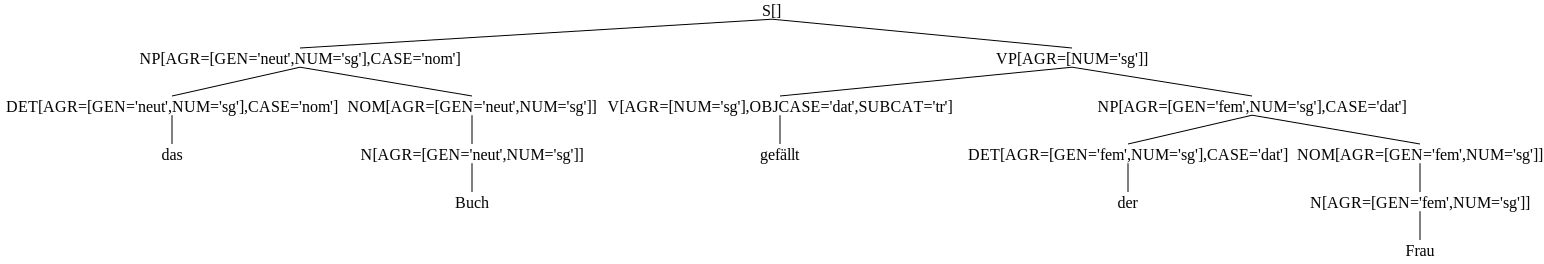

Satz 2: das Buch kennt die Frau


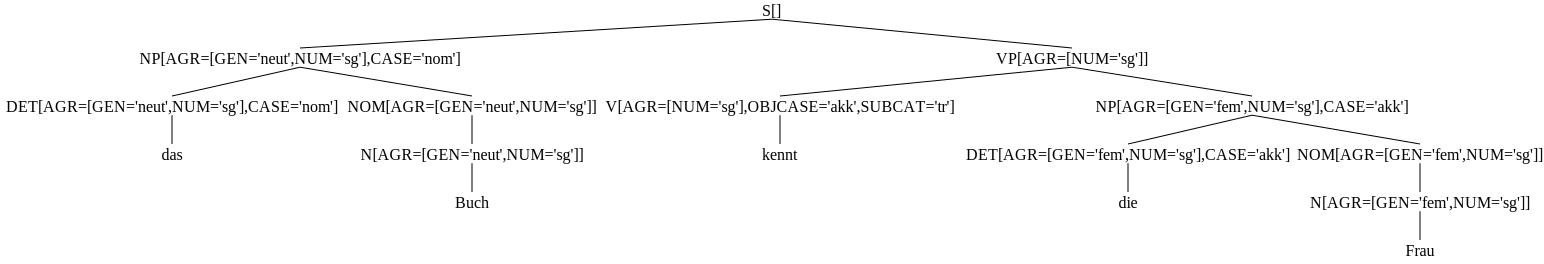

Satz 3: der Mann gibt der Frau das Buch


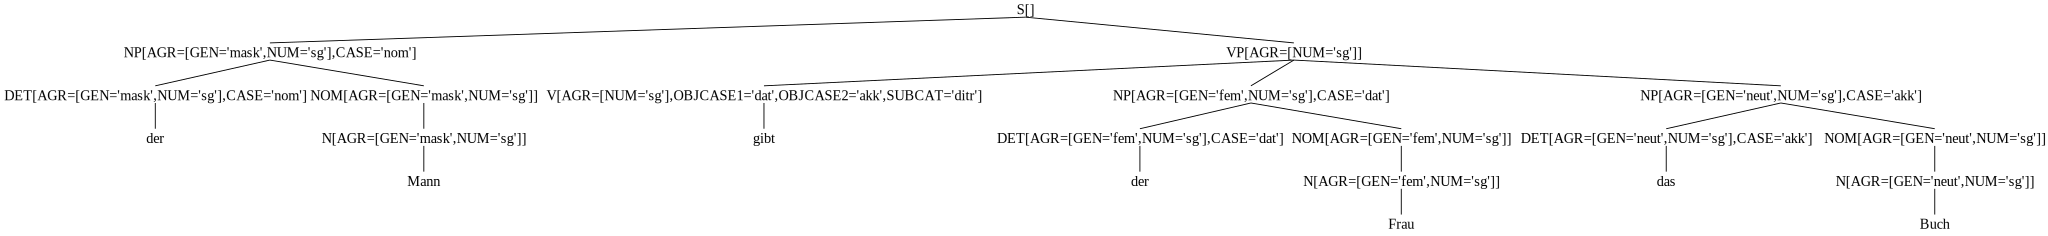

Satz 4: die Männer geben der Frau das Buch


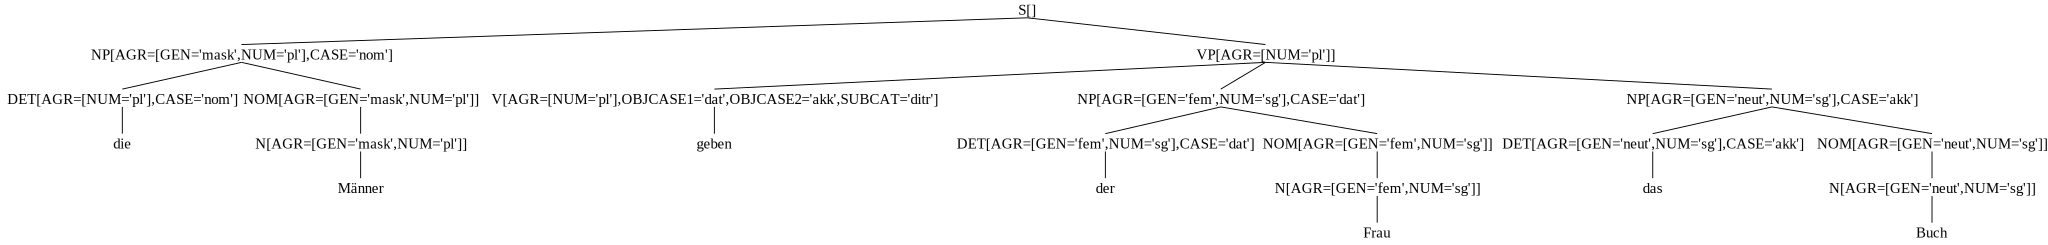

Satz 5: die Bücher gefallen der Frau


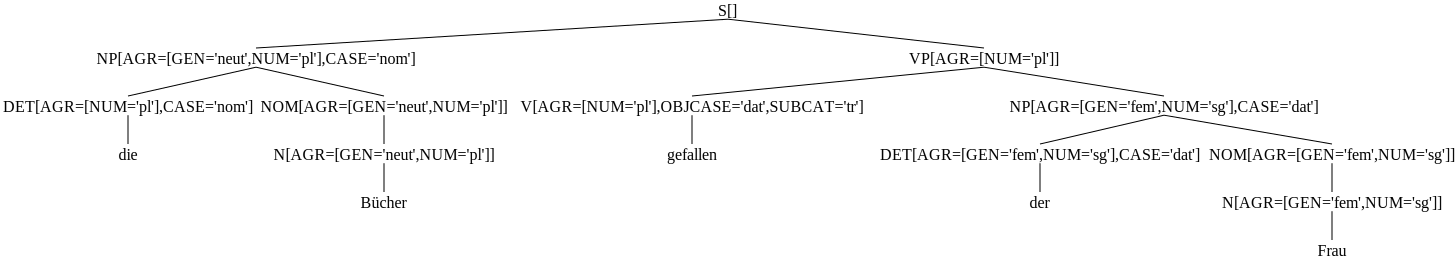

Satz 6: die Frauen schlafen


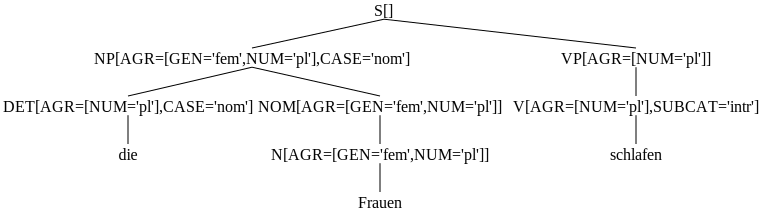

In [30]:
test_grammar(grammar, pos_sentences)